In [1]:
import pandas as pd 
import numpy as np 
import pickle
import os 
from scipy.stats import norm
os.chdir(r'C:\Users\User\Desktop\Optimization\Algorithms\Genetic Algorithm')
from ga import *
os.chdir(r'C:\Users\User\Desktop\Optimization\Algorithms\Bayesian MCMC')
from BayesianOptimizer import *
import time
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## DBE Histogram

No handles with labels found to put in legend.


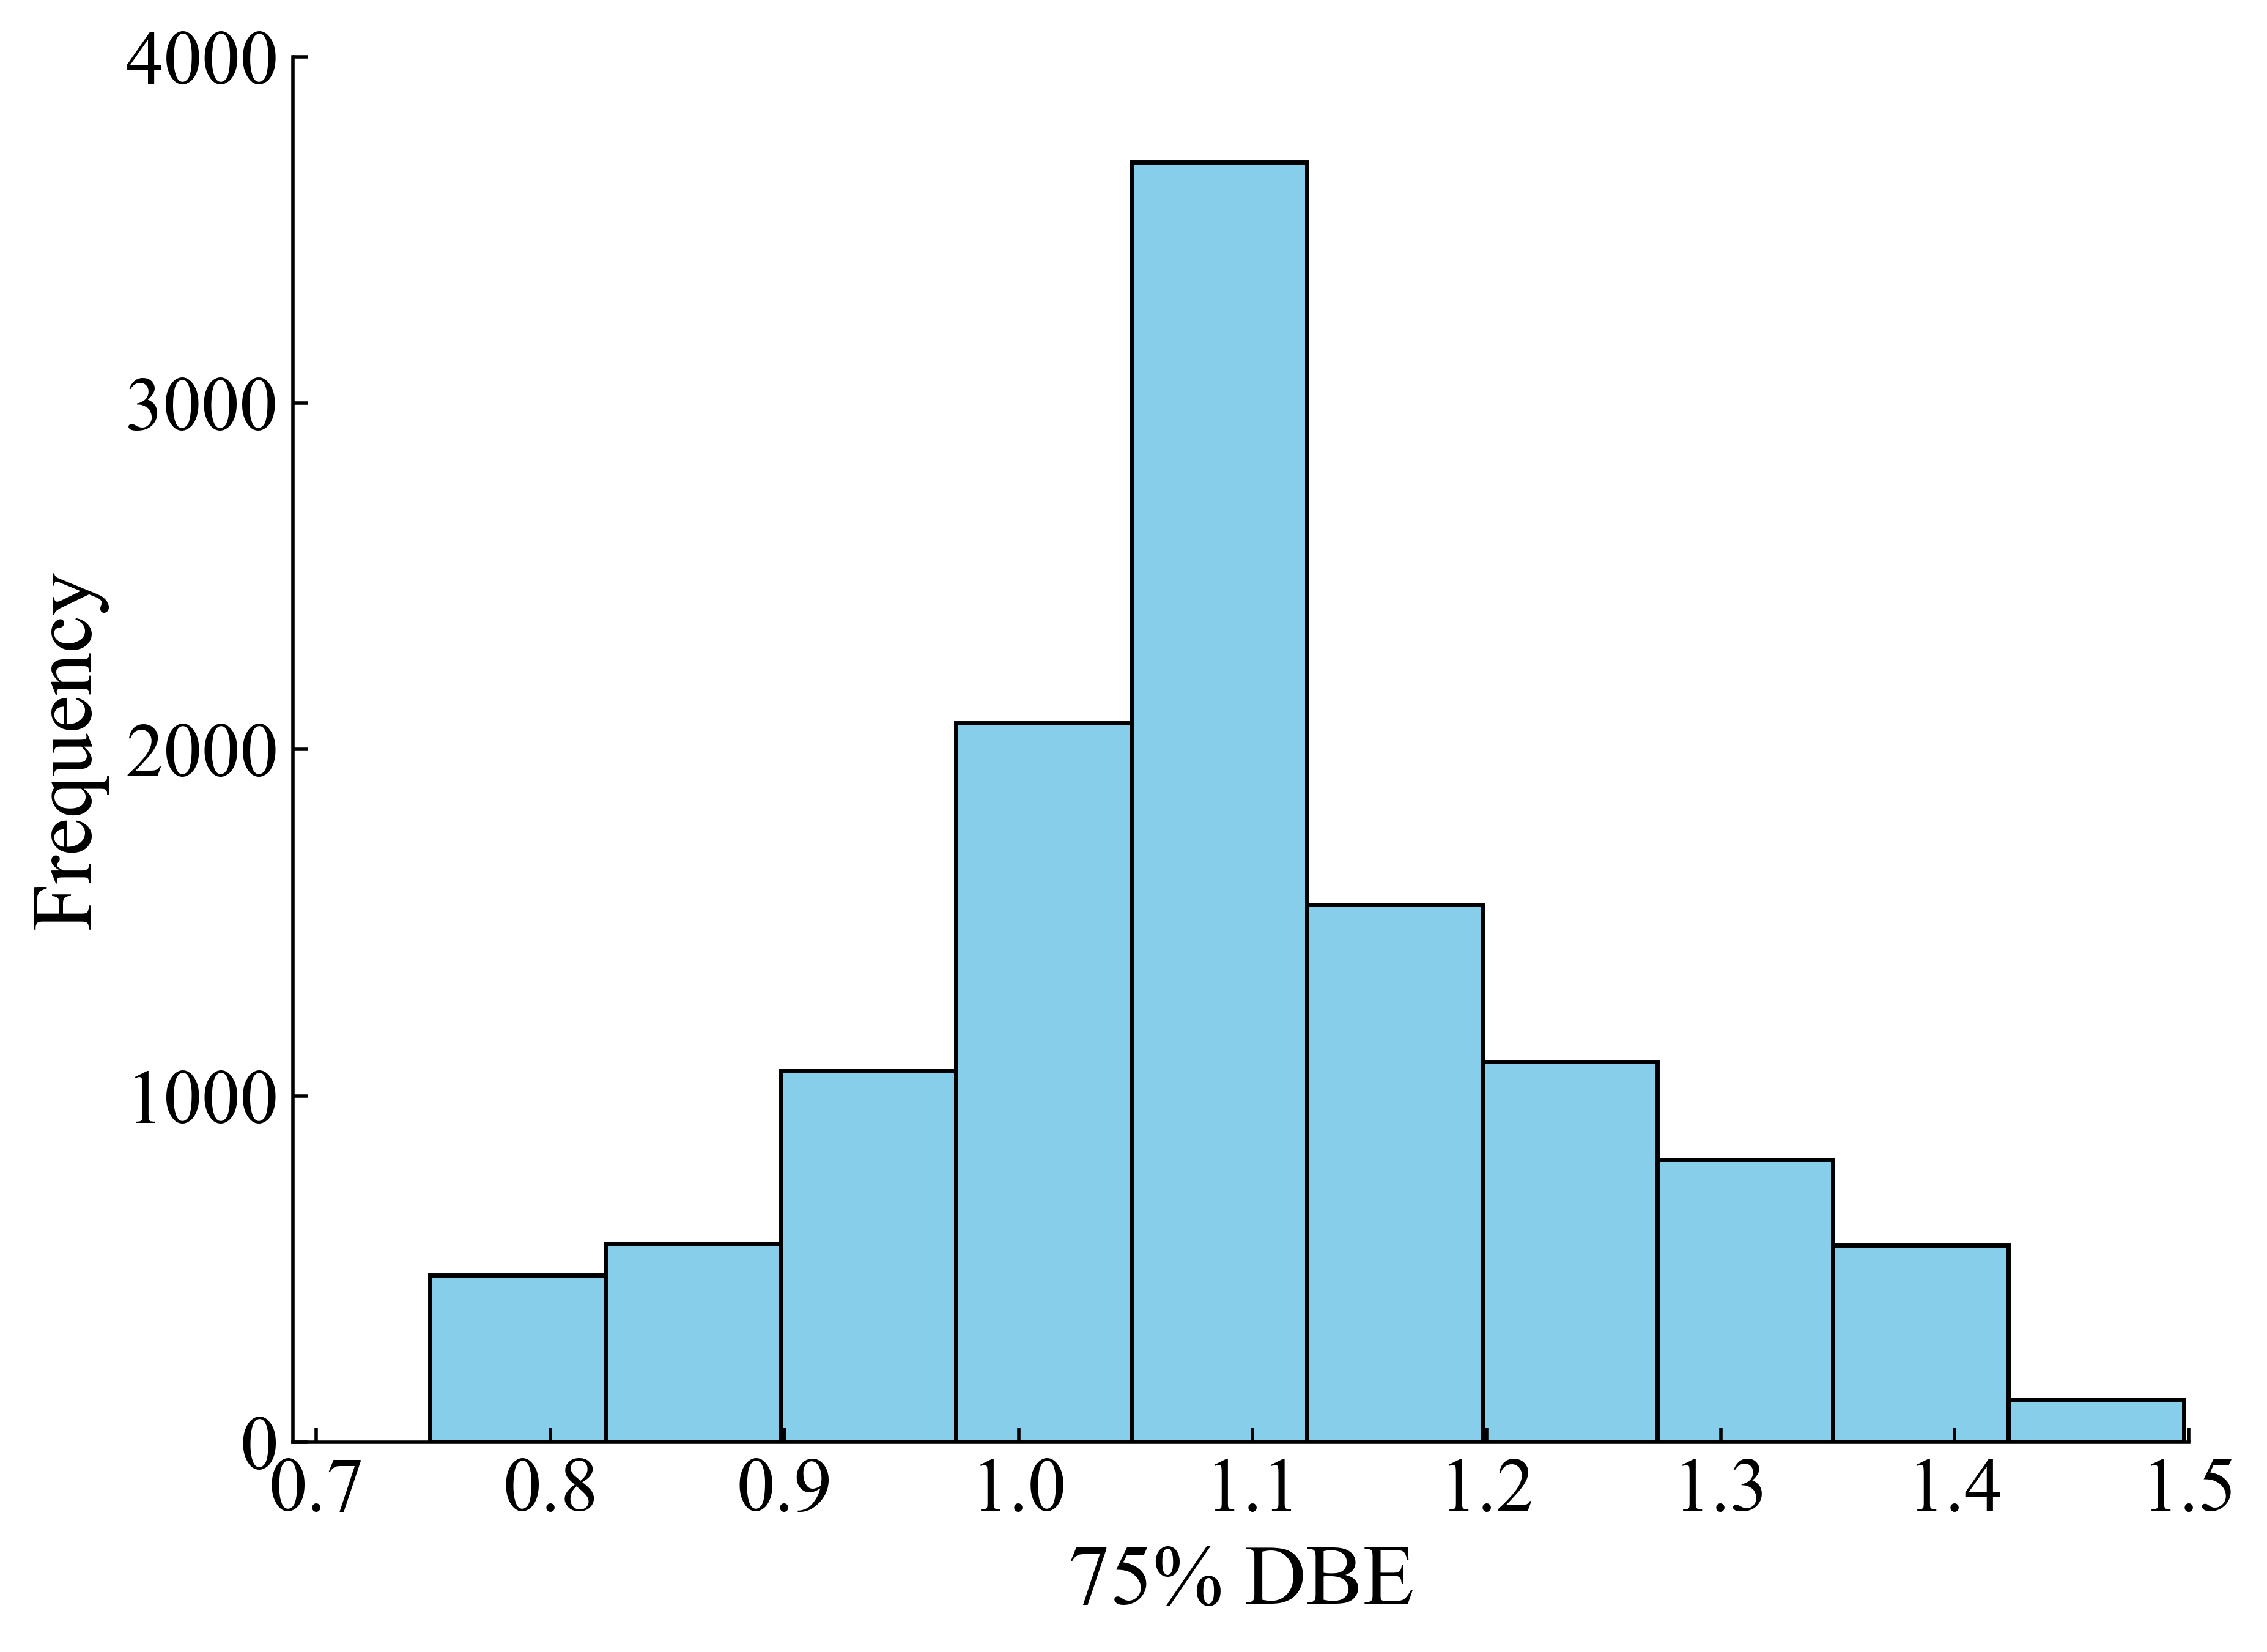

In [2]:
DBE = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\DBEResults\Sa_simulated_real.csv', header=None)
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.hist(DBE.values,bins=10, edgecolor = 'black', color="skyblue" )
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xlim([0.69,1.5])
plt.xticks( fontname = 'Times New Roman', fontsize = 18)
plt.ylim([0,4000])
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('75% DBE', **font)
plt.ylabel('Frequency', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

In [3]:
im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]
shape = []
for k in range(8):
    sub = DBE.loc[(DBE.iloc[:,0] < im_bin[k+1]) & (DBE.iloc[:,0] > im_bin[k]), :].iloc[:,0]
    shape.append(sub.shape[0])

## Evaluate Results

In [4]:
# read-in all results
BaseDirectory = r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\WeightSensitivity'
os.chdir(BaseDirectory + r'\Results\1thWeight')

x_bests = pd.DataFrame(columns=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4], index = range(200))

for i in range(200):
    results = pd.read_csv('%ithOptimization.csv'%i)
    x_bests.iloc[i-1,:] = results.values[0][1:]

No handles with labels found to put in legend.


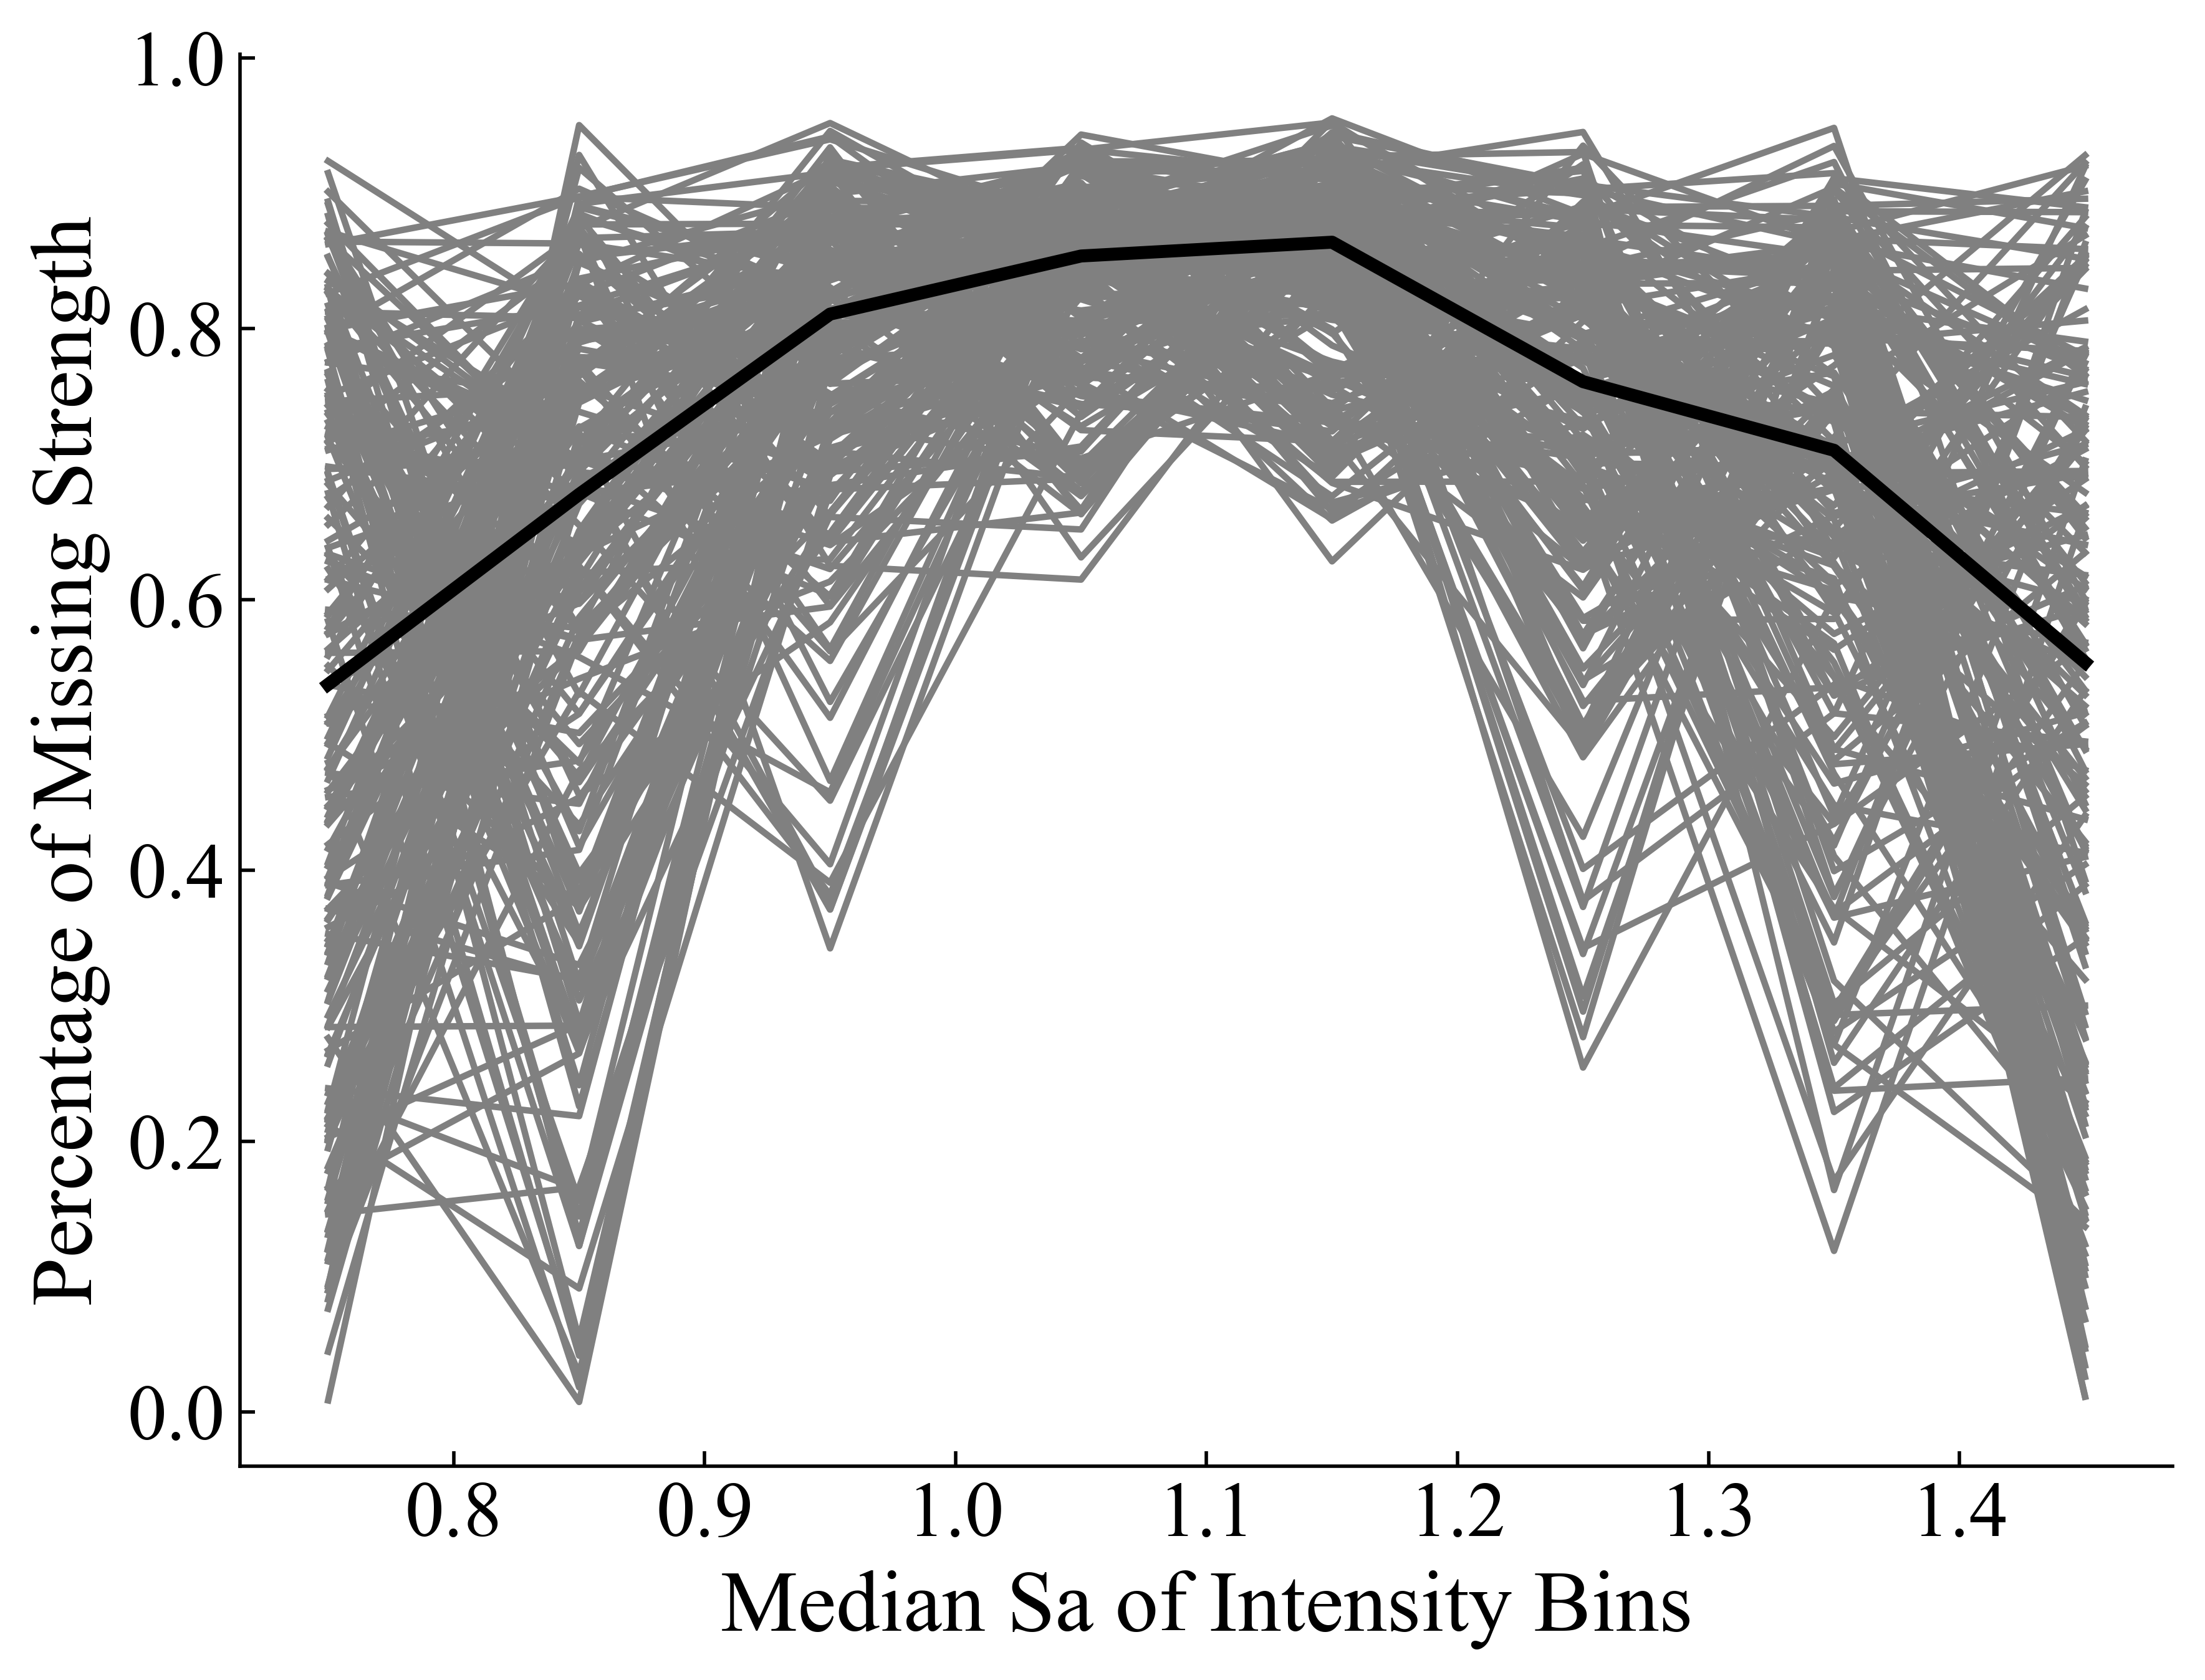

In [5]:
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
for i in range(200):
    ax.plot([0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45], list(x_bests.iloc[i,:].values), color='grey')
ax.plot([0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45], np.median(x_bests, axis = 0), color = 'black', linewidth = 3)
plt.xlabel('Median Sa of Intensity Bins', **font)
plt.ylabel('Percentage of Missing Strength', **font)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

In [6]:
np.median(x_bests, axis = 0)

array([0.5373147823253948, 0.6776796686980564, 0.8108382470888009,
       0.8537486161975294, 0.8639264114170233, 0.7609222356570593,
       0.710229536829122, 0.5536388483053063], dtype=object)

In [7]:
median = np.median(x_bests, axis = 0)
retrof_ratio = {}
prop = {}
retrof_ds_ratio = {}
retrof_ds_median = {}
for i in range(1,9):
    temp = pd.DataFrame() 
    temp['Index'] = existing_prop['Index']
    temp['Xpeakstrength'] = np.divide(np.multiply(median[i-1], missing_strength['X Diff']) + peak_strength['Xpeakstrength'], peak_strength['Xpeakstrength'])
    temp['Zpeakstrength'] = np.divide(np.multiply(median[i-1], missing_strength['Z Diff']) + peak_strength['Zpeakstrength'], peak_strength['Zpeakstrength'])
    temp = pd.concat([temp,retrof_upper_limit]).min(level=0)
    retrof_ratio[i] = temp
    prop[i] = existing_prop.drop(columns=['Xpeakstrength', 'Zpeakstrength'])
    prop[i]['Xpeakstrength'], prop[i]['Zpeakstrength'] = retrof_ratio[i]['Xpeakstrength'], retrof_ratio[i]['Zpeakstrength']

    retrof_ds_ratio[i] = pd.DataFrame(data = prop[i]['Index'])
    retrof_ds_ratio[i]['complete_ratio'] = retrof_complete_ratio.predict(prop[i].iloc[:,1:])
    retrof_ds_median[i] = pd.DataFrame(data = np.multiply(retrof_ds_ratio[i]['complete_ratio'],existing_ds['Complete']))
    retrof_ds_median[i].insert(0,'Index', retrof_ds_ratio[i]['Index'])

NameError: name 'existing_prop' is not defined

In [ ]:
# Sample unknown buildings 
def samplecase(OriginalData):
    InventoryData = OriginalData
    InventoryData = InventoryData.drop(columns = ['SMS'])
    for i in range(InventoryData.shape[0]):
        # Randomly assign number of stories
        if np.isnan(InventoryData.iloc[i,2]):
            InventoryData.iloc[i,2] = np.random.choice(np.arange(2, 4), p=[0.759, 0.241])
            
        # Randomly assign floor type          
        if pd.isnull(InventoryData.iloc[i,3]):
            InventoryData.iloc[i,3] = np.random.choice(np.arange(1, 5), p=[0.159, 0.011, 0.458, 0.372])
            
    
    
    InventoryData.loc[InventoryData['Story'] == 2,'Story'] = "2"
    InventoryData.loc[InventoryData['Story'] == 3,'Story'] = "3"
    
    InventoryData.loc[InventoryData['Type'] == 1,'Type'] = 'FWL1'
    InventoryData.loc[InventoryData['Type'] == 2,'Type'] = 'FWL2'
    InventoryData.loc[InventoryData['Type'] == 3,'Type'] = 'FWL3'
    InventoryData.loc[InventoryData['Type'] == 4,'Type'] = 'FWL4'
    
    InventoryData.loc[InventoryData['Type'] == 'FWL1','Type'] = 'L1'
    InventoryData.loc[InventoryData['Type'] == 'FWL2','Type'] = 'L2'
    InventoryData.loc[InventoryData['Type'] == 'FWL3','Type'] = 'L3'
    InventoryData.loc[InventoryData['Type'] == 'FWL4','Type'] = 'L4'
    
#     Randomly assign material type 
    mat = np.random.choice(np.arange(1, 3), size = InventoryData.shape[0], p=[0.5, 0.5])
    InventoryData['Material'] = mat
    
    InventoryData.loc[InventoryData['Material'] == 1,'Material'] = 'GWB'
    InventoryData.loc[InventoryData['Material'] == 2,'Material'] = 'HWS'
    
#     Randomly assign dimension 
    dim = np.random.choice(np.arange(1, 3), size = InventoryData.shape[0], p=[0.5, 0.5])
    InventoryData['Dimension'] = dim
    
#     Assign floor type
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X30'
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X30'
    
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '60X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '60X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*30*3
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '100X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '100X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*30*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X50'
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X50'
    
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*50*3
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*50*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == 1),'Dimension'] = '50X30'
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == 2),'Dimension'] = '80X30'
    
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '50X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 50*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '50X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 50*30*3
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '80X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 80*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '80X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 80*30*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X50'
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X50'
    
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*50*3
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*50*3

    InventoryData['Index'] = InventoryData['Type'] + '-' + InventoryData['Story'] + 'S-' + InventoryData['Dimension'].astype('str') + '-' + InventoryData['Material']
    
    #     Randomly assign repair cost
    InventoryData['Num_Units'] = (np.round(InventoryData['Area'].values/1000)).astype(int)
    Median_Cost = np.interp(InventoryData['Num_Units'],[4,30],[6250,4000])
    
    InventoryData['RepairCost'] = np.random.normal(Median_Cost,400)*InventoryData['Num_Units']
    
    return InventoryData

In [9]:
os.chdir(r'C:\Users\User\Desktop\XGBoostPipline\Models\MixedTrainTest\Retrofit')
# retrof_slight_ratio = pickle.load(open('Retrof_Slight_Ratio.pkl','rb'))
# retrof_moderate_ratio = pickle.load(open('Retrof_Moderate_Ratio.pkl','rb'))
# retrof_severe_ratio = pickle.load(open('Retrof_Severe_Ratio.pkl','rb'))
retrof_complete_ratio = pickle.load(open('Retrof_Complete_Ratio.pkl','rb'))

os.chdir(BaseDirectory)
OriginalBuildingInfo = pd.read_csv('LA Inventory.csv')

# Random assign unknown buildings
sampled_building_info = samplecase(OriginalBuildingInfo)
# sampled_building_info = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\sampled_building_info.csv') # use the same sampled building info to compare the results

# Optimize for the M7.1 senario
sa_simulated = pd.read_csv('DBEResults\Sa_simulated_real.csv', header = None)

# Read existing building damage state
existing_ds = pd.read_csv('building_ds.csv')

# Read existing building properties and pushover 
existing_prop = pd.read_csv('building_performance.csv')

# Read building configuration, which is mainly used for loss assessment 
building_config = pd.read_csv('building_configuration.csv')

# Read building losses
total_loss = pd.read_csv('ds_loss.csv')

# Read building fatality 
# total_fatality = pd.read_csv('fatality_rate.csv')
# Use complete loss as criteria: complete loss = building collapse loss + fatality loss ($2 million per fatality)
total_fatality = pd.read_csv('complete_loss.csv') 

# Read retrofit upper limit, which corresponding to NON SWOF building peak strength
retrof_upper_limit = pd.read_csv('UpperLimit.csv')

# Read missing strength
missing_strength = pd.read_csv('building_miss_strength.csv')

# Read existing building damage state medians
existing_ds = pd.read_csv('building_ds.csv')

# Existing pushover peak strength
peak_strength = pd.DataFrame()
peak_strength['Index'] = existing_prop['Index']
peak_strength['Xpeakstrength'] = np.multiply(existing_prop['SeismicWeight'], existing_prop['Xpeakstrength'])
peak_strength['Zpeakstrength'] = np.multiply(existing_prop['SeismicWeight'], existing_prop['Zpeakstrength'])

[17:05:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
def total_strength(percentage_miss_strength, sampled_building_info, Sa_map, miss_strength, IM_bin):
    '''
    This function is developed for compute the total strength added by algorithm
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    cost_map = pd.DataFrame(np.zeros(Sa_map.shape))
    for k in range(8):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Total Force'] = np.multiply(percentage_miss_strength[k], miss_strength['X Diff']) + np.multiply(percentage_miss_strength[k], miss_strength['Z Diff'])
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), :].iloc[:,j]
            if sub_Sa_map.shape[0] == 0: 
                continue
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_cost = sub_building_map.merge(temp)
            cost_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = building_cost.iloc[:,1]

    total_cost =  cost_map.mean(axis = 1).sum()
    return total_cost

def summary_fatality(percentage_miss_strength):
    '''
    This function is developed for compute the total strength added by algorithm
    '''
    im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]
    retrof_ratio = {}
    prop = {}
    retrof_ds_ratio = {}
    retrof_ds_median = {}
    for i in range(1,9):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Xpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['X Diff']) + peak_strength['Xpeakstrength'], peak_strength['Xpeakstrength'])
        temp['Zpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['Z Diff']) + peak_strength['Zpeakstrength'], peak_strength['Zpeakstrength'])
        temp = pd.concat([temp,retrof_upper_limit]).min(level=0)
        retrof_ratio[i] = temp
        prop[i] = existing_prop.drop(columns=['Xpeakstrength', 'Zpeakstrength'])
        prop[i]['Xpeakstrength'], prop[i]['Zpeakstrength'] = retrof_ratio[i]['Xpeakstrength'], retrof_ratio[i]['Zpeakstrength']

        retrof_ds_ratio[i] = pd.DataFrame(data = prop[i]['Index'])
        retrof_ds_ratio[i]['complete_ratio'] = retrof_complete_ratio.predict(prop[i].iloc[:,1:])
        # Compute retrofitted buildings damage state medians 
        retrof_ds_median[i] = pd.DataFrame(data = np.multiply(retrof_ds_ratio[i]['complete_ratio'],existing_ds['Complete']))
        retrof_ds_median[i].insert(0,'Index', retrof_ds_ratio[i]['Index'])

    region_fatality = compute_fatality(sampled_building_info, total_fatality, retrof_ds_median, sa_simulated, im_bin)
    individual_fatality = compute_individual_fatality(sampled_building_info, total_fatality, retrof_ds_median, sa_simulated, im_bin)
    return region_fatality, individual_fatality

def compute_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map, IM_bin):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    IM_bin: different retrofit strength is applied to different intensity bins
    '''

    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(total_fatality)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))

    # Loop over all shake maps
    for k in range(8):
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), :].iloc[:,j]
            if sub_Sa_map.shape[0] == 0: 
                continue
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_ds_median = sub_building_map.merge(building_dsm[k+1])
            ds_prob_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = norm.cdf(np.log(sub_Sa_map.astype('float64')), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    return portfolio_fatality

def ordinance_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(building_fatality)

    # Building damage state median at each location 
    building_ds_median = buildings.merge(building_dsm)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))
    # Loop over all shake maps
    for j in range(Sa_map.shape[1]):
        ds_prob_map.iloc[:,j] = norm.cdf(np.log(Sa_map.iloc[:,j]), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    individual_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1])
    return portfolio_fatality,individual_fatality

def compute_individual_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map, IM_bin):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(total_fatality)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))

    # Loop over all shake maps
    for k in range(8):
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j]
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_ds_median = sub_building_map.merge(building_dsm[k+1])
            ds_prob_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = norm.cdf(np.log(sub_Sa_map), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    individual_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1])

    return individual_fatality

In [11]:
# compute algorithm reduction for DBE 
im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]

algorithm_best = np.median(x_bests, axis = 0)
total_fatality_algorithm, algorithm_individual = summary_fatality(algorithm_best)
total_cost = total_strength(algorithm_best, sampled_building_info, sa_simulated, missing_strength, im_bin)

In [12]:
ordinance_ds = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\ordinance_building_ds.csv')
ordinance_ds = ordinance_ds.drop(columns=['Slight', 'Moderate', 'Severe'])
of_DBE, of_individual = ordinance_fatality(sampled_building_info, total_fatality, ordinance_ds, sa_simulated)
ef_DBE, ef_individual = ordinance_fatality(sampled_building_info, total_fatality, existing_ds.drop(columns=['Slight', 'Moderate', 'Severe']), sa_simulated)
ordinance_strength = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\ordinance_inc_strength.csv')
merged_info = sampled_building_info.merge(ordinance_strength, left_on='Index', right_on='Index')
oc_DBE = merged_info['X Inc Force'].sum() + merged_info['Z Inc Force'].sum()

In [17]:
print(1-total_fatality_algorithm/ef_DBE)
print(1-of_DBE/ef_DBE)
print(total_cost/oc_DBE)

0.17709036009607082
0.2546770478269216
0.05785303923352349


In [13]:
fatality_dist = pd.DataFrame(data=[ef_individual.values.T, of_individual.values.T, algorithm_individual.values.T])
fatality_dist = fatality_dist.T
fatality_dist.to_csv(r'C:\Users\User\Desktop\PaperFigures\CollapseLossDistribution.csv')

## Sensitivity Results

In [41]:
# read-in all results
BaseDirectory = r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\WeightSensitivity'
os.chdir(BaseDirectory + r'\Results\1thWeight')

x_sens = []
x_bests = pd.DataFrame(columns=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4], index = range(200))

for j in range(10):
    os.chdir(BaseDirectory + r'\Results\%ithWeight'%j)
    for i in range(200):
        results = pd.read_csv('%ithOptimization.csv'%i)
        x_bests.iloc[i-1,:] = results.values[0][1:]
    x_sens.append(np.median(x_bests, axis = 0))

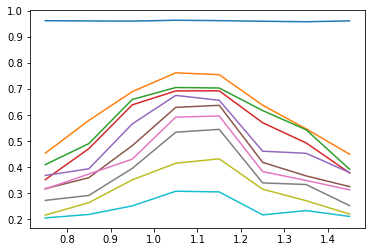

In [42]:
W = [0, 1000000, 2000000, 3000000, 5000000, 8000000, 10000000, 15000000, 20000000, 50000000]
for i in x_sens:
    plt.plot([0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45], i)

In [45]:
algorithm_loss_sens, algorithm_cost_sens = [], []

for i in x_sens:
    l, _ = summary_fatality(i)
    c = total_strength(i, sampled_building_info, sa_simulated, missing_strength, im_bin)
    algorithm_loss_sens.append(l)
    algorithm_cost_sens.append(c)

No handles with labels found to put in legend.


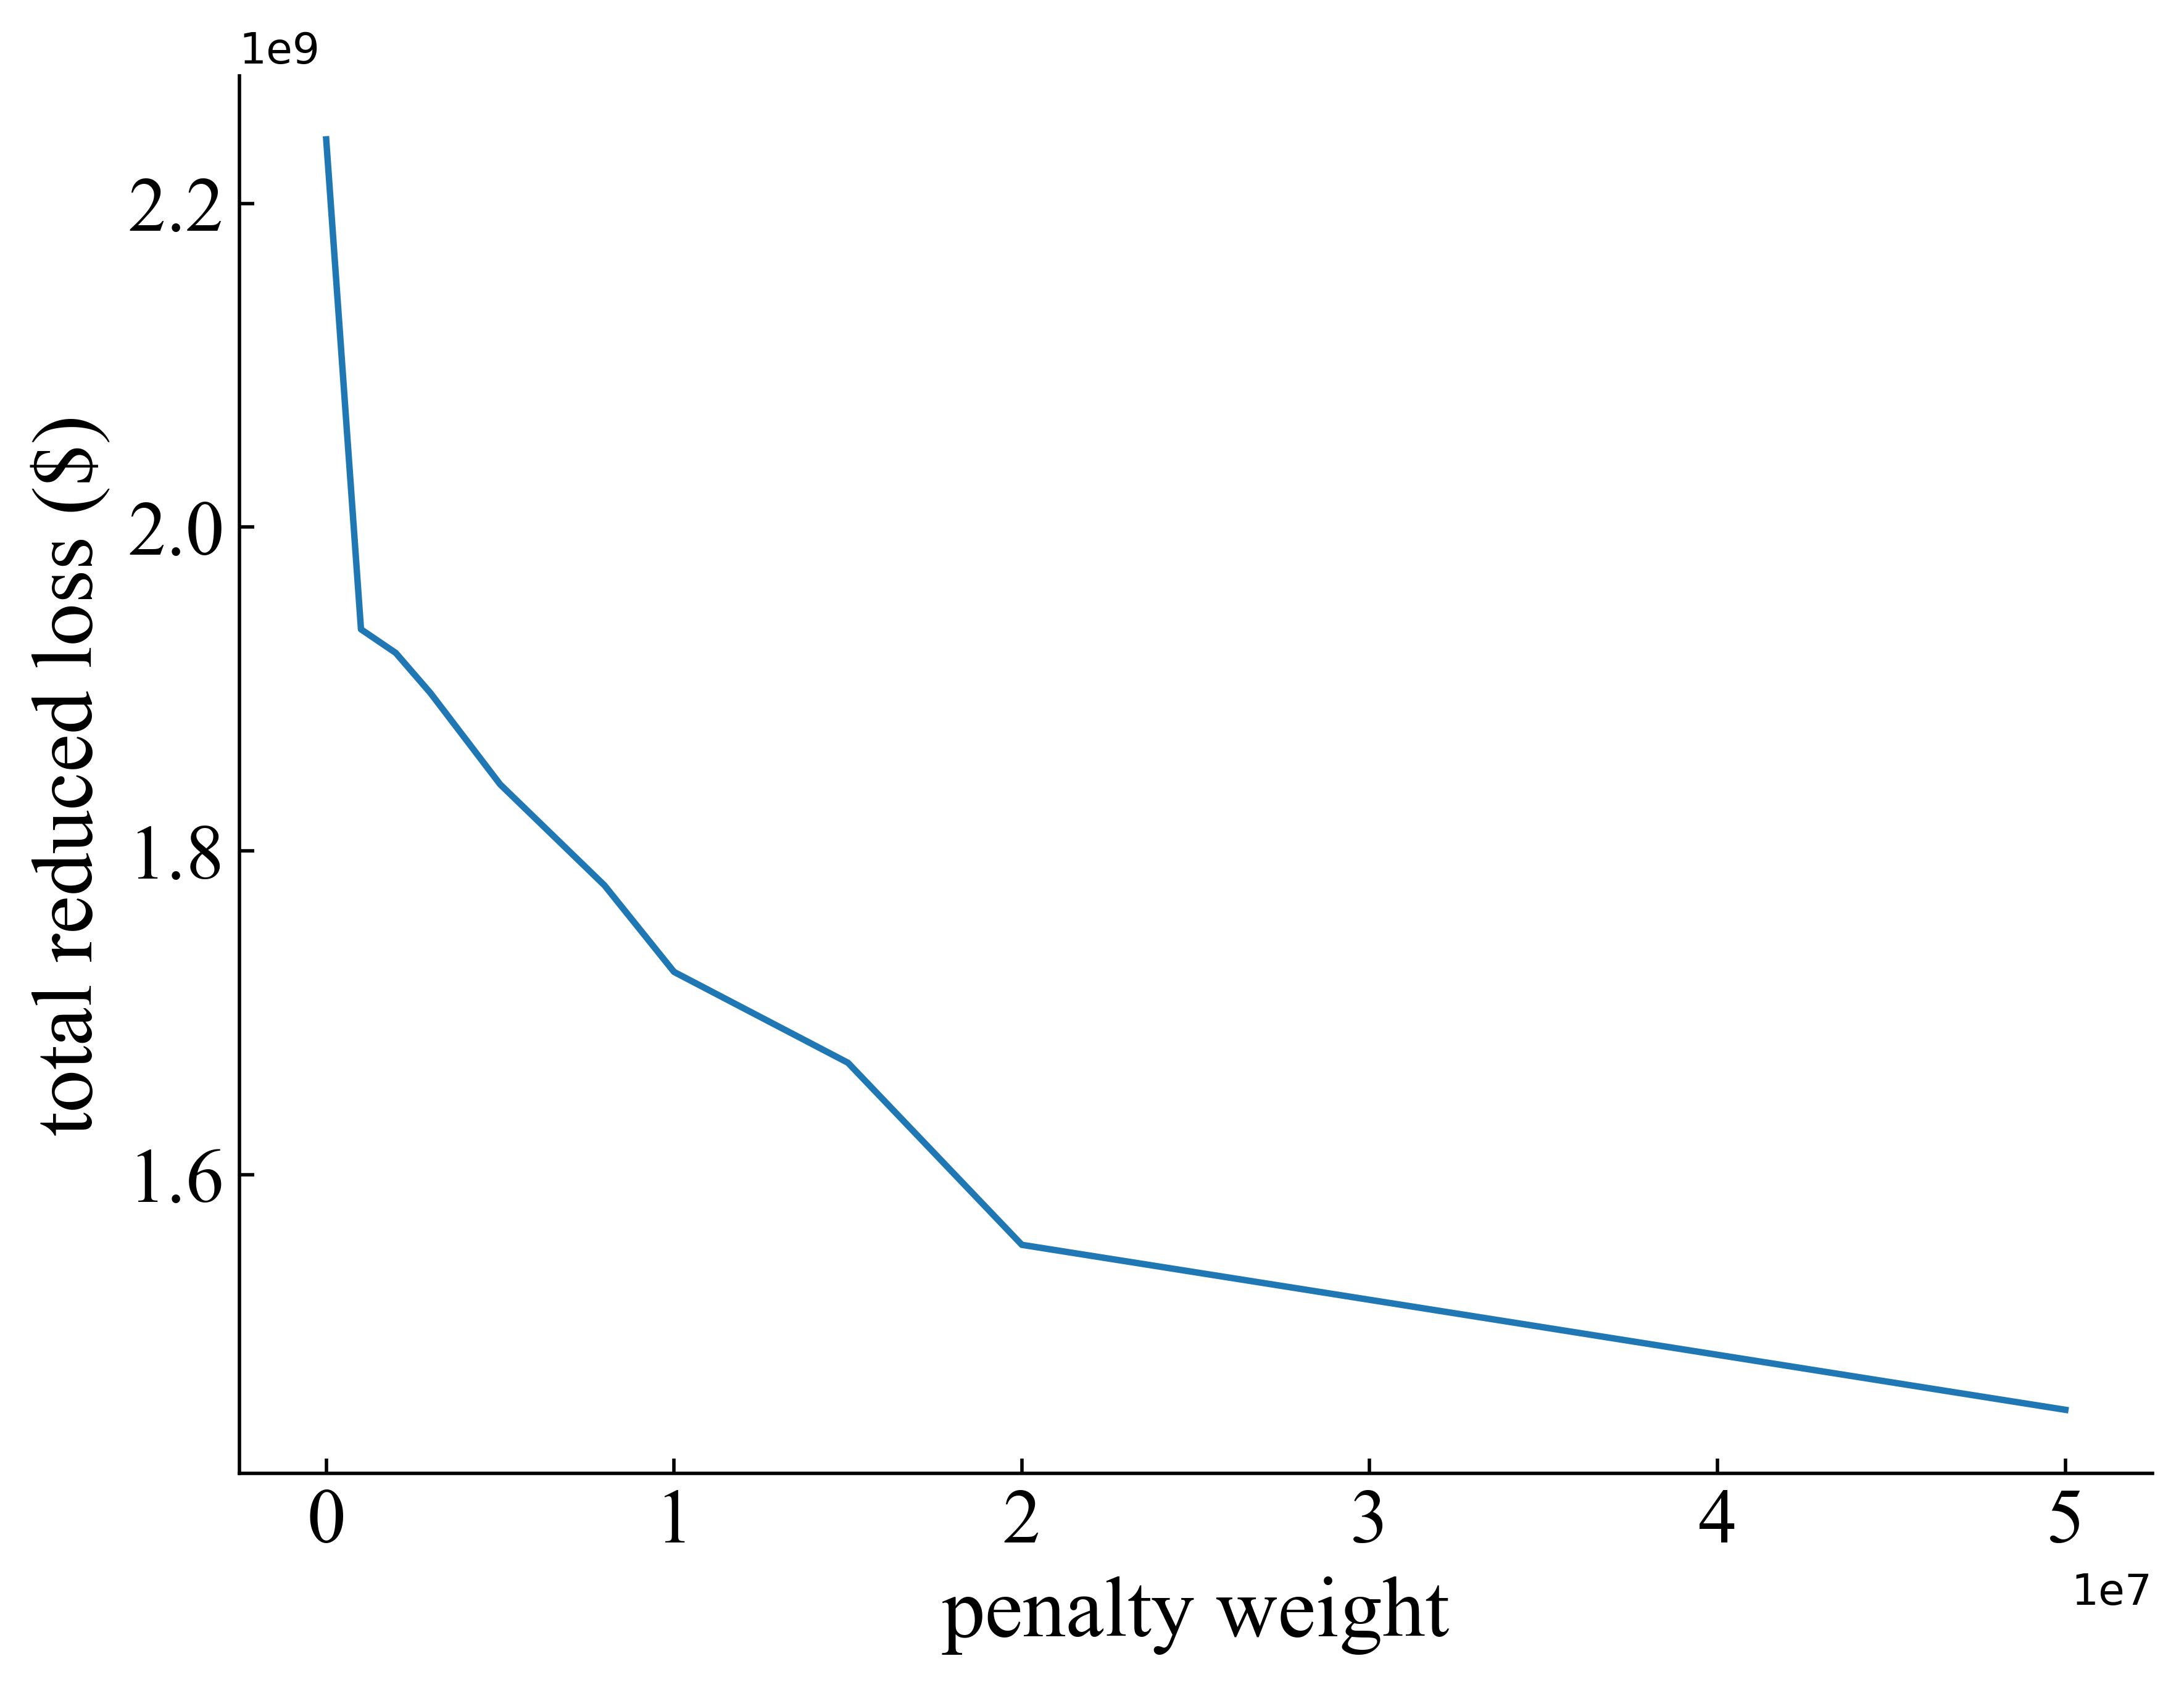

In [66]:
# plt.plot(W, algorithm_cost_sens)
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.plot(W,ef_DBE-algorithm_loss_sens)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('penalty weight', **font)
plt.ylabel('total reduced loss ($)', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

No handles with labels found to put in legend.


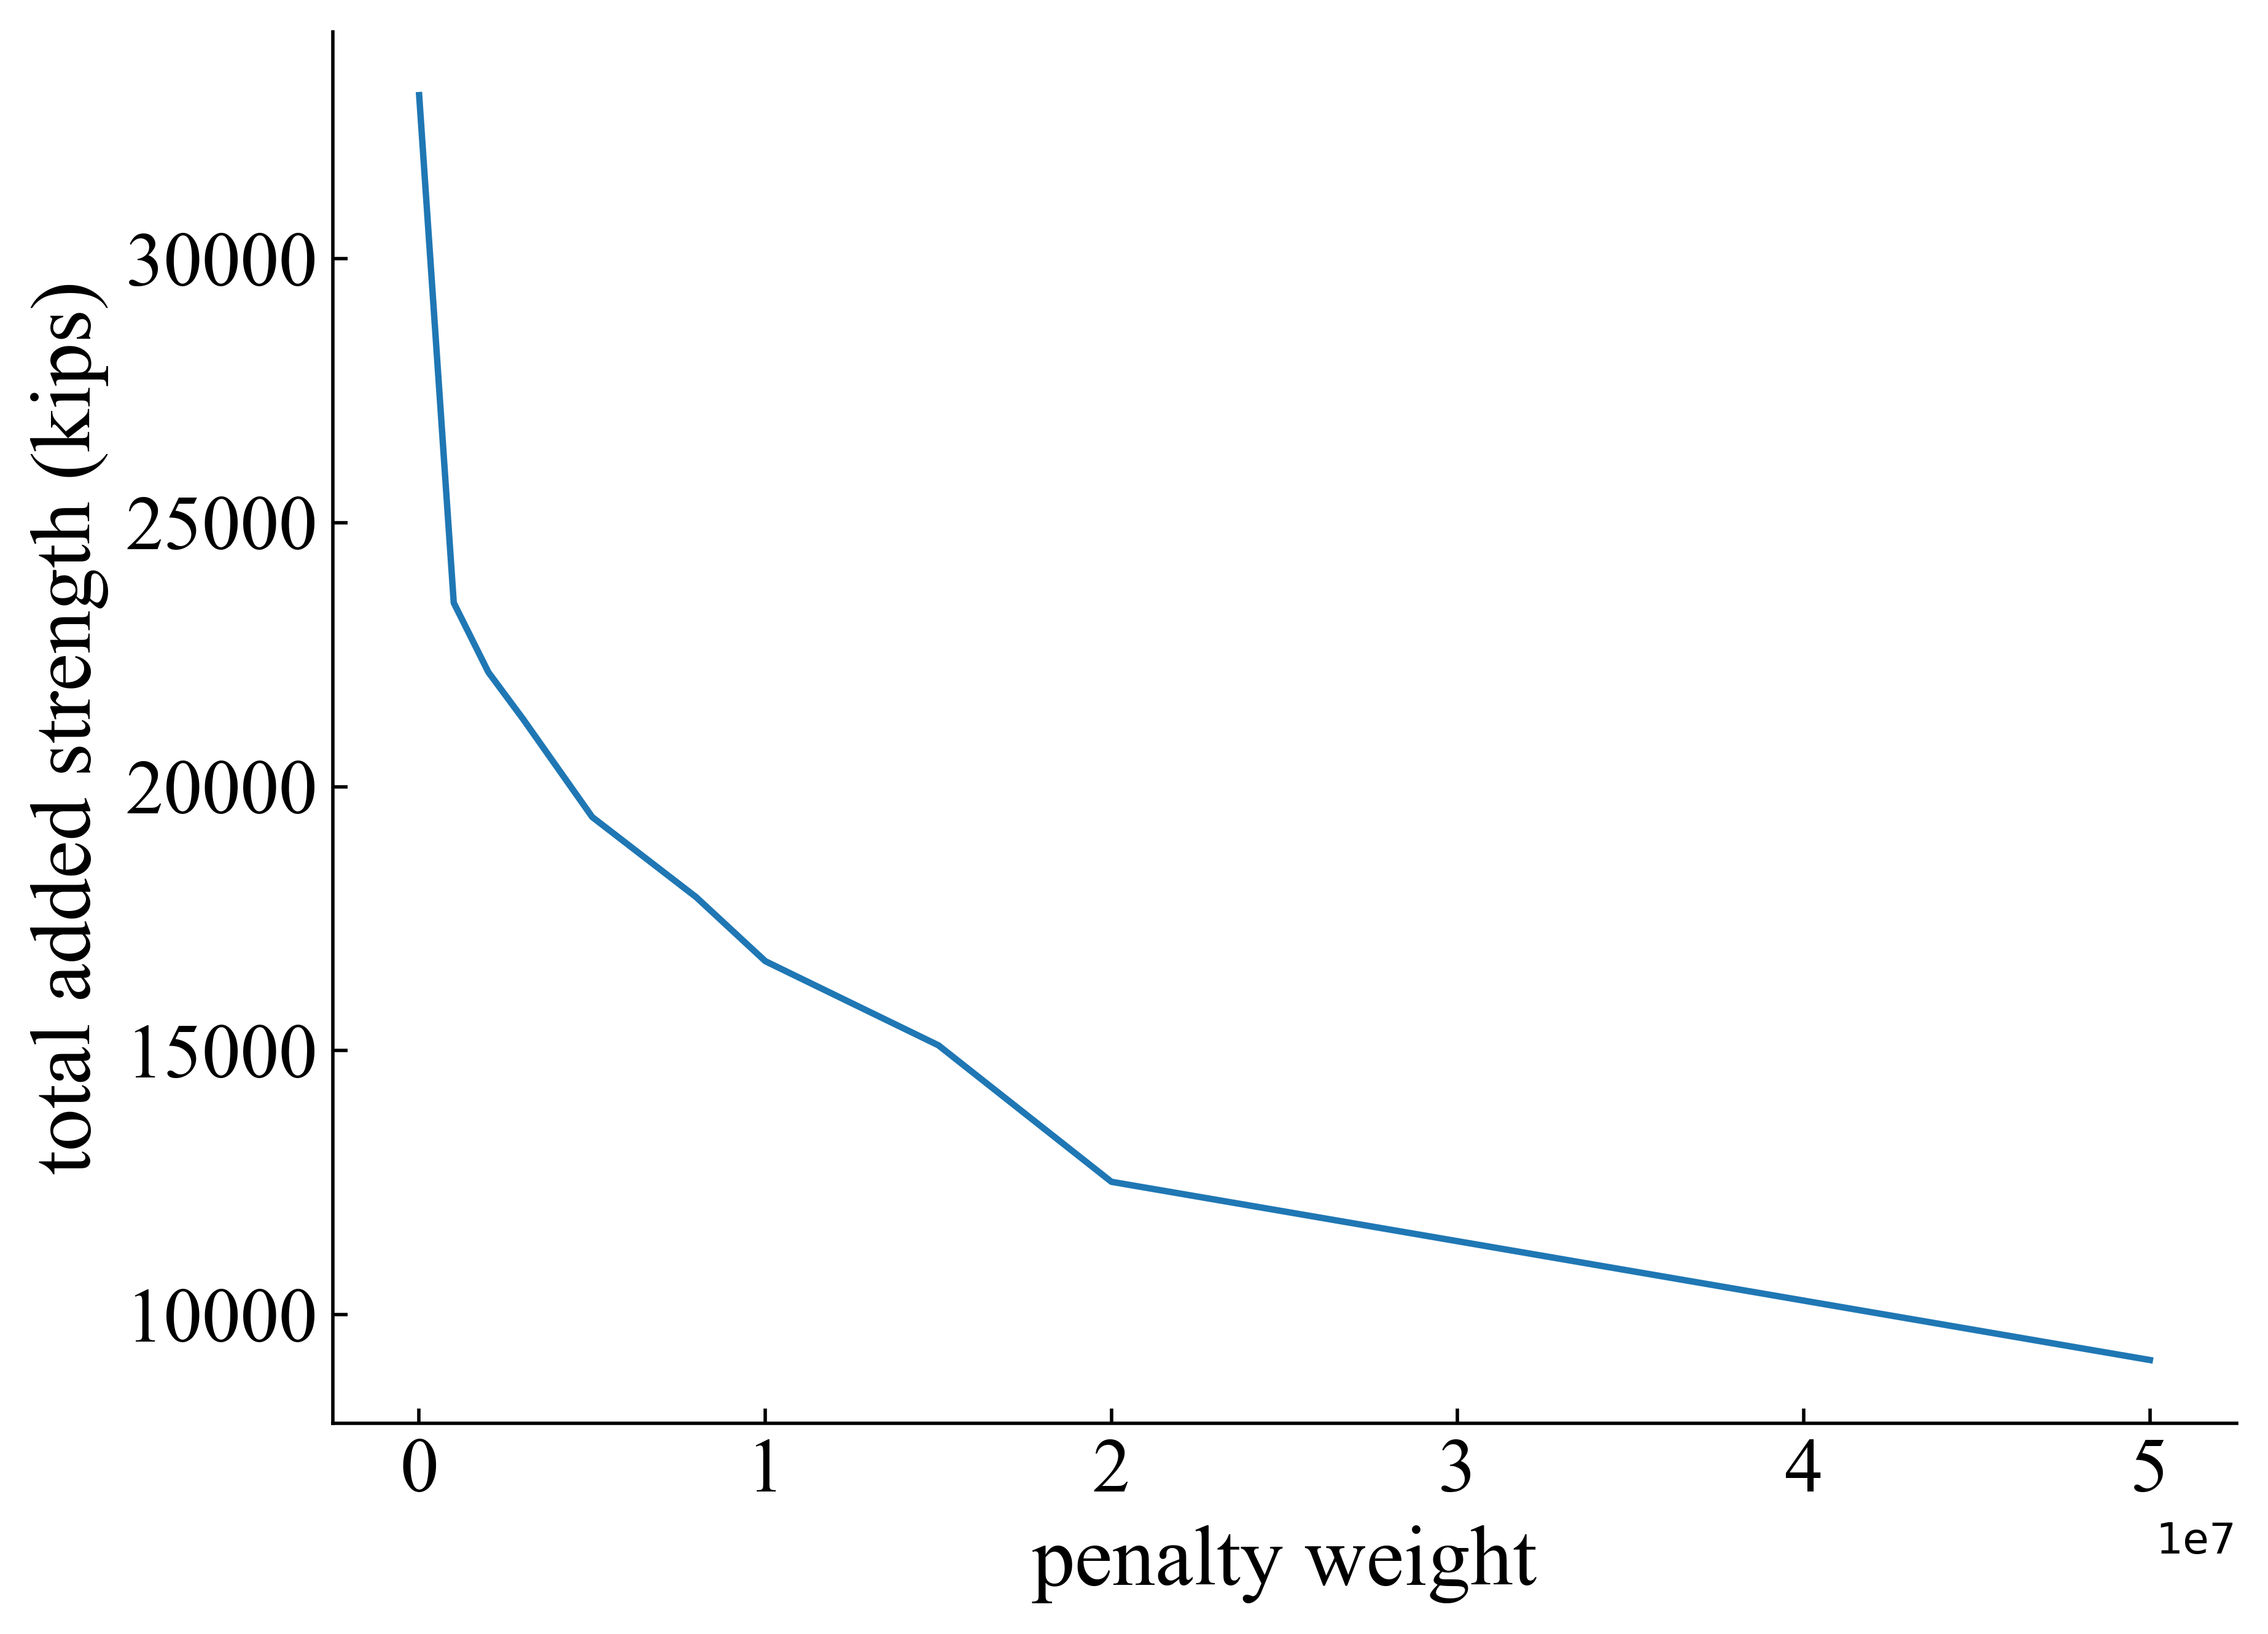

In [64]:
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.plot(W, algorithm_cost_sens)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('penalty weight', **font)
plt.ylabel('total added strength (kips)', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

In [54]:
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.plot(W, algorithm_cost_sens)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('penalty weight', **font)
plt.ylabel('total added strength (kips)', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

[33098.3583634015,
 23482.467749304393,
 22168.328806174584,
 21283.556226026816,
 19424.944074654988,
 17909.28579580858,
 16694.860051694952,
 15101.777071472086,
 12515.665830815626,
 9140.44684838532]

No handles with labels found to put in legend.


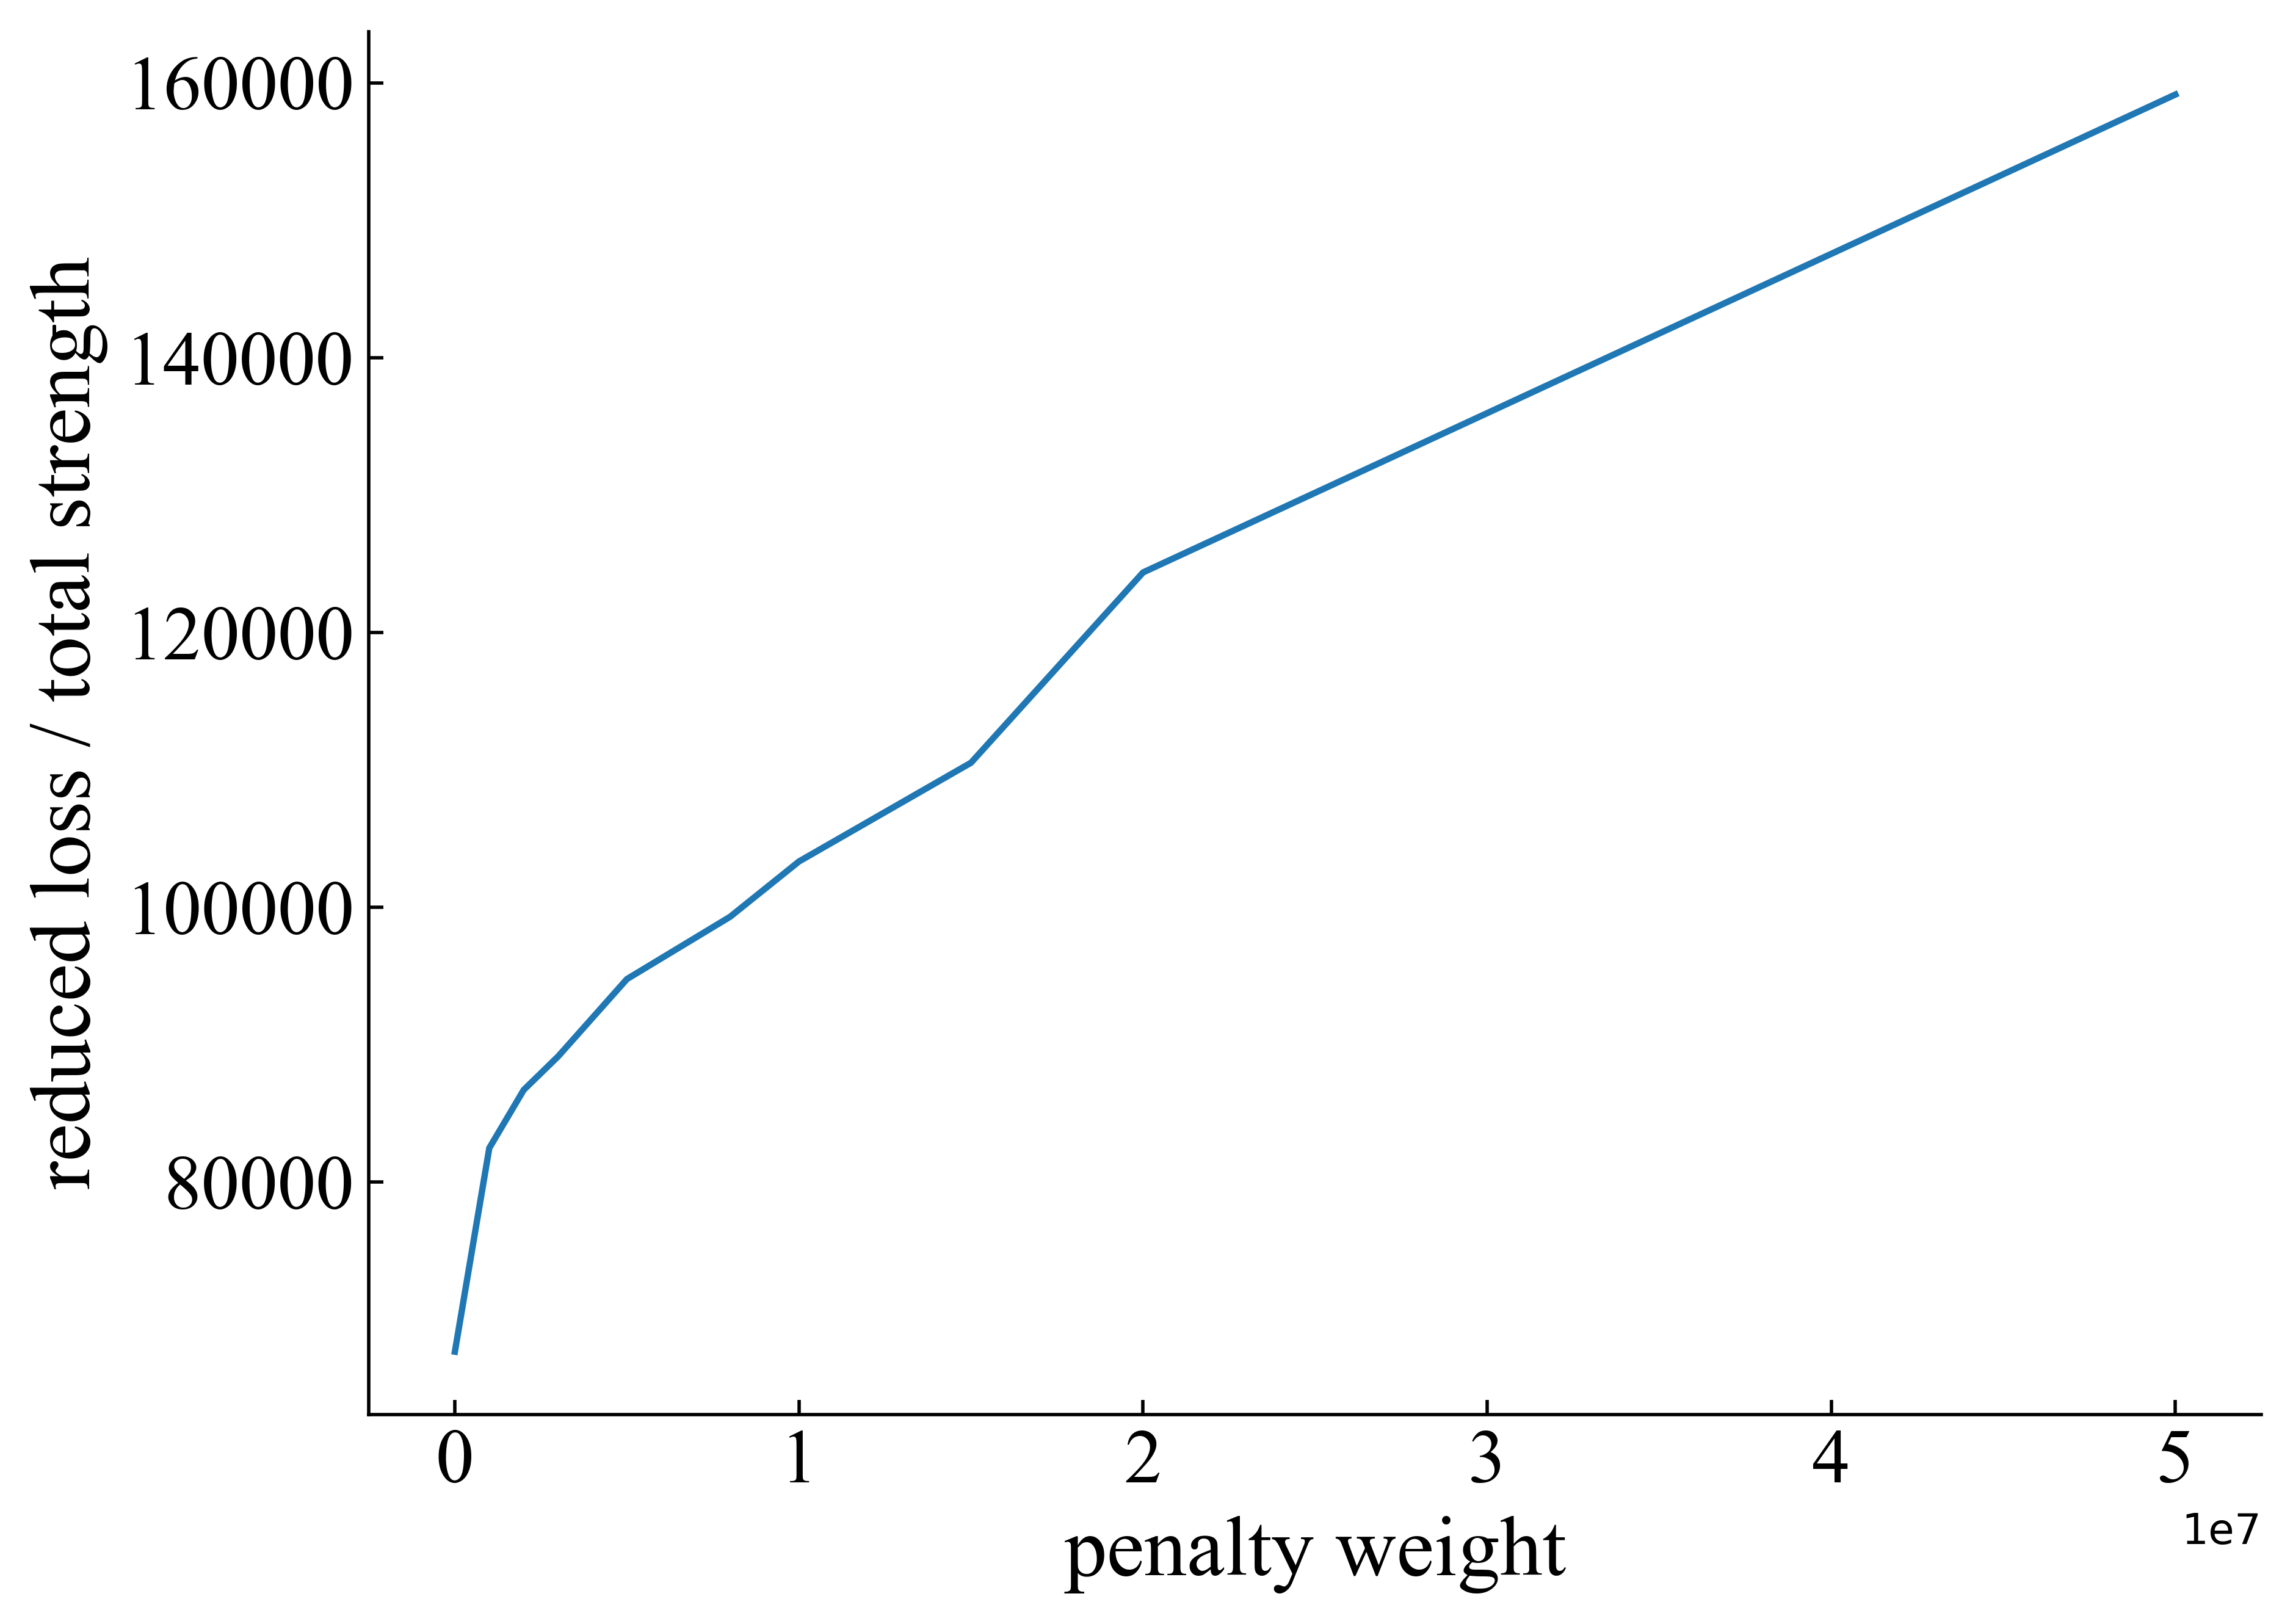

In [68]:
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.plot(W,np.divide(ef_DBE-algorithm_loss_sens, algorithm_cost_sens))
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('penalty weight', **font)
plt.ylabel('reduced loss / total strength', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

## Puente Hill

In [18]:
def summary_fatality(percentage_miss_strength, sa):
    '''
    This function is developed for compute the total strength added by algorithm
    '''
    im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]
    retrof_ratio = {}
    prop = {}
    retrof_ds_ratio = {}
    retrof_ds_median = {}
    for i in range(1,9):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Xpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['X Diff']) + peak_strength['Xpeakstrength'], peak_strength['Xpeakstrength'])
        temp['Zpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['Z Diff']) + peak_strength['Zpeakstrength'], peak_strength['Zpeakstrength'])
        temp = pd.concat([temp,retrof_upper_limit]).min(level=0)
        retrof_ratio[i] = temp
        prop[i] = existing_prop.drop(columns=['Xpeakstrength', 'Zpeakstrength'])
        prop[i]['Xpeakstrength'], prop[i]['Zpeakstrength'] = retrof_ratio[i]['Xpeakstrength'], retrof_ratio[i]['Zpeakstrength']

        retrof_ds_ratio[i] = pd.DataFrame(data = prop[i]['Index'])
        retrof_ds_ratio[i]['complete_ratio'] = retrof_complete_ratio.predict(prop[i].iloc[:,1:])
        # Compute retrofitted buildings damage state medians 
        retrof_ds_median[i] = pd.DataFrame(data = np.multiply(retrof_ds_ratio[i]['complete_ratio'],existing_ds['Complete']))
        retrof_ds_median[i].insert(0,'Index', retrof_ds_ratio[i]['Index'])

    region_fatality = compute_fatality(sampled_building_info, total_fatality, retrof_ds_median, sa_simulated, sa, im_bin)
    return region_fatality

def compute_fatality(sampled_building_info, building_fatality, building_dsm, design_Sa, Sa_map, IM_bin):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    IM_bin: different retrofit strength is applied to different intensity bins
    '''

    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(total_fatality, how='left')

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))

    # Loop over all shake maps
    for k in range(8):
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(design_Sa.iloc[:,0] < IM_bin[k+1]) & (design_Sa.iloc[:,0] >= IM_bin[k]), :].iloc[:,j]
            if sub_Sa_map.shape[0] == 0: 
                continue
            sub_building_map = buildings.loc[(design_Sa.iloc[:,0] < IM_bin[k+1]) & (design_Sa.iloc[:,0] >= IM_bin[k]),:]
            building_ds_median = sub_building_map.merge(building_dsm[k+1])
            ds_prob_map.loc[(design_Sa.iloc[:,0] < IM_bin[k+1]) & (design_Sa.iloc[:,0] >= IM_bin[k]), j] = norm.cdf(np.log(sub_Sa_map.astype('float64')), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    return portfolio_fatality

    
def ordinance_fatality_representative_events(sampled_building_info, building_fatality, building_dsm, Sa_map):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(building_fatality)

    # Building damage state median at each location 
    building_ds_median = buildings.merge(building_dsm, how = 'left')

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))
    # Loop over all shake maps
    for j in range(Sa_map.shape[1]):
        ds_prob_map.iloc[:,j] = norm.cdf(np.log(Sa_map.iloc[:,j]), loc = np.log(building_ds_median.iloc[:,1].astype('float')), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    
    return portfolio_fatality



## Puente Hill

In [19]:
os.chdir(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\PuenteHillResults')
Sa = pd.read_csv('Sa_simulated_real.csv', header = None)
algorithm_loss=summary_fatality(algorithm_best, Sa)
ordinance_loss=ordinance_fatality_representative_events(sampled_building_info, total_fatality, ordinance_ds, Sa)
existing_loss=ordinance_fatality_representative_events(sampled_building_info, total_fatality, existing_ds.drop(columns=['Slight', 'Moderate', 'Severe']), Sa)
# r = pd.DataFrame(data=[existing_loss,ordinance_loss,algorithm_loss])

In [20]:
print(1-algorithm_loss/existing_loss)
print(1-ordinance_loss/existing_loss)
print(total_cost/oc_DBE)

0.04326333759896239
0.20789441805529763
0.05785303923352349


## Stochastic Event Simulation

In [87]:
os.chdir(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE')
stochastic_results = pd.read_csv('EvaluationResults.csv')
rate = pd.read_csv(r'D:\Google Drive\Research\Ph.D. Topic Research\Cost_Benefit\UCERF2_Event_Processed_Data\RateofExceedance.csv',header=None)
rate = rate.iloc[0:8312]

In [46]:
or_reduction = 1 - np.divide(stochastic_results.Ordinance,stochastic_results.Existing)
al_reduction = 1 - np.divide(stochastic_results.Algorithm,stochastic_results.Existing)


In [94]:
ex_lembda, or_lembda, al_lembda = [], [], []
evaluated_loss = np.linspace(1000000, max(stochastic_results.Existing),100)
for i in range(100):
    threshold = evaluated_loss[i]
    ex_lembda.append(np.multiply((stochastic_results.Existing > threshold).values, rate.values.T[0]).sum())
    or_lembda.append(np.multiply((stochastic_results.Ordinance > threshold).values, rate.values.T[0]).sum())
    al_lembda.append(np.multiply((stochastic_results.Algorithm > threshold).values, rate.values.T[0]).sum())


In [99]:
print(np.interp(0.2*10**10,evaluated_loss,ex_lembda ))
print(np.interp(0.2*10**10,evaluated_loss,or_lembda ))
print(np.interp(0.2*10**10,evaluated_loss,al_lembda ))

0.017022036826626216
0.011234823504952864
0.013909655030058471


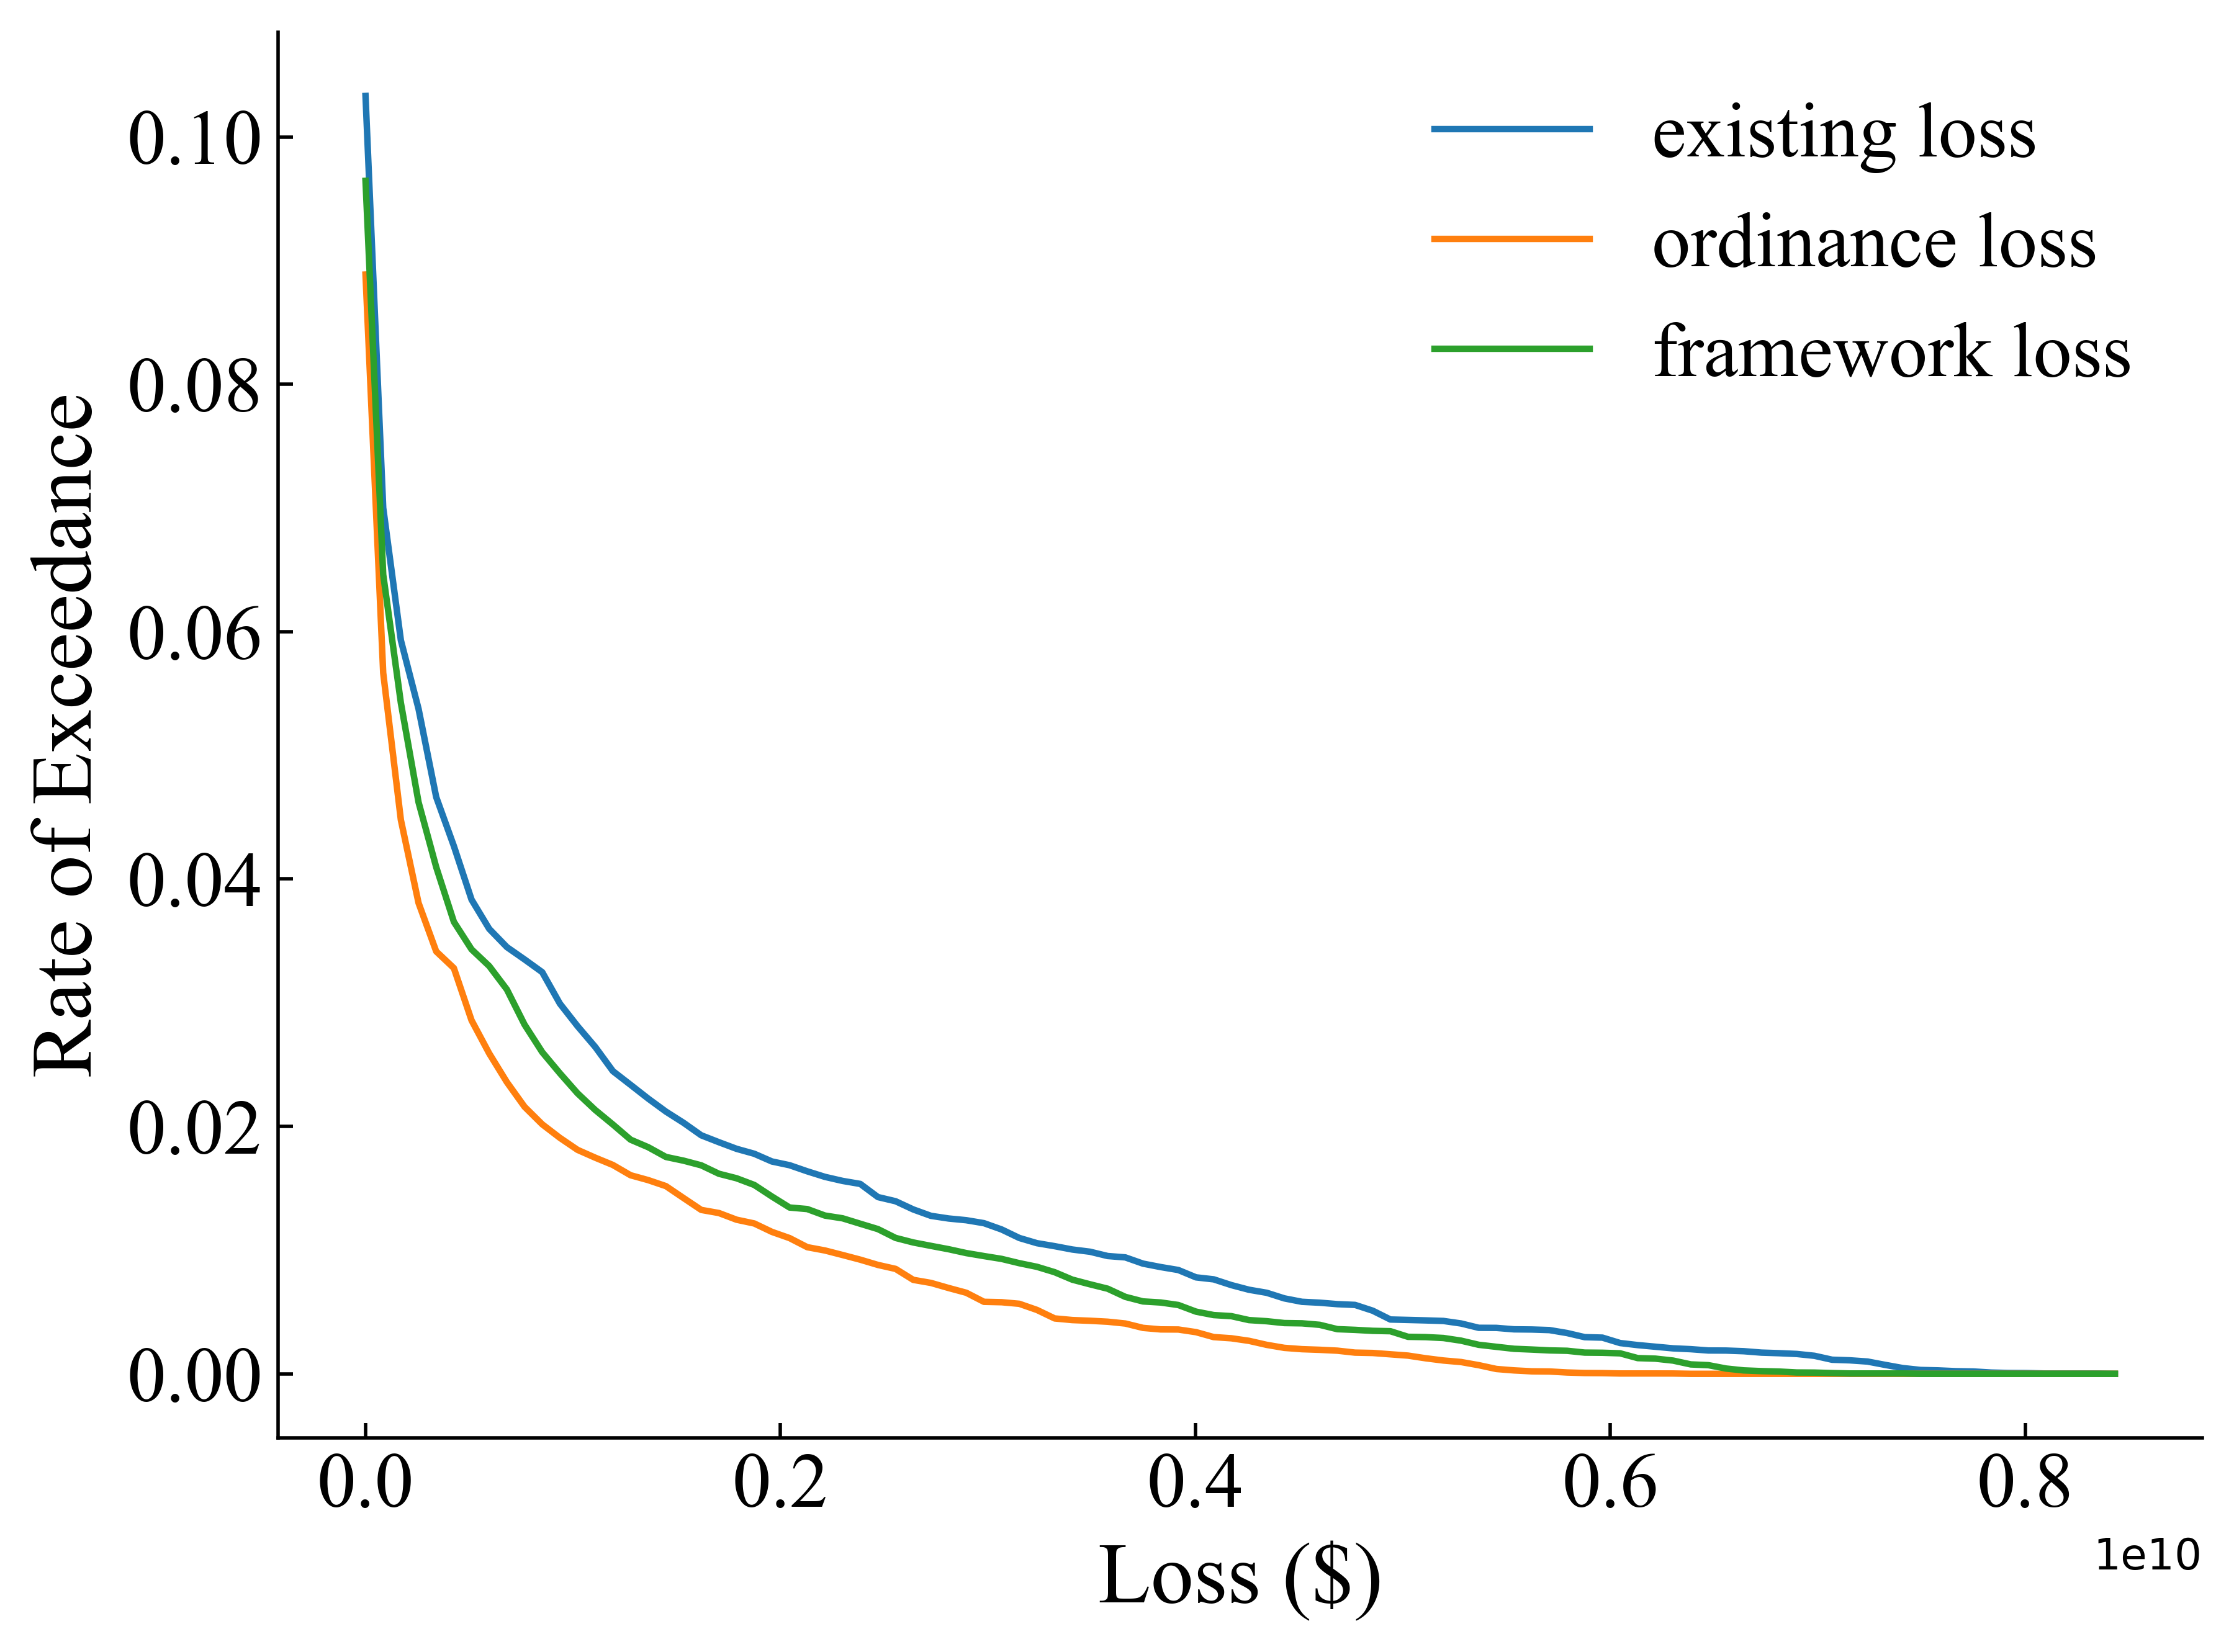

In [96]:
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.plot(evaluated_loss, ex_lembda, label = 'existing loss')
ax.plot(evaluated_loss, or_lembda, label = 'ordinance loss')
ax.plot(evaluated_loss, al_lembda, label = 'framework loss')

ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks(fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('Loss ($)', **font)
plt.ylabel('Rate of Exceedance', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()
